In [692]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [693]:
!rm -rf ./out
!mkdir ./out

In [694]:
cur_dir = %pwd

In [695]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [696]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [697]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [698]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [699]:
df = df.sort_index()

In [700]:
df.to_csv("test_res.csv")

In [701]:
df = df.iloc[:, -5:]
df = df.applymap(lambda x: np.log10(x) if x > 0 else 0)

In [702]:
df.describe()

,2023-12-26T10:14:50.393635,2023-12-26T10:17:09.195342,2023-12-26T10:45:05.817134,2023-12-26T10:49:04.838992,2023-12-26T10:59:02.481073
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.681582,5.667655,5.646147,5.661283,5.655764
std,1.293316,1.300447,1.295160,1.292527,1.305840
min,2.598791,2.468347,1.602060,2.468347,1.602060
25%,4.674313,4.650158,4.634533,4.651300,4.643715
50%,5.554638,5.517362,5.474725,5.515952,5.508490
75%,6.417412,6.452748,6.470657,6.467140,6.474976
max,9.826034,9.794100,9.760335,9.760335,9.788731


In [703]:
df.iloc[:, -1].mean()

5.655764163813905

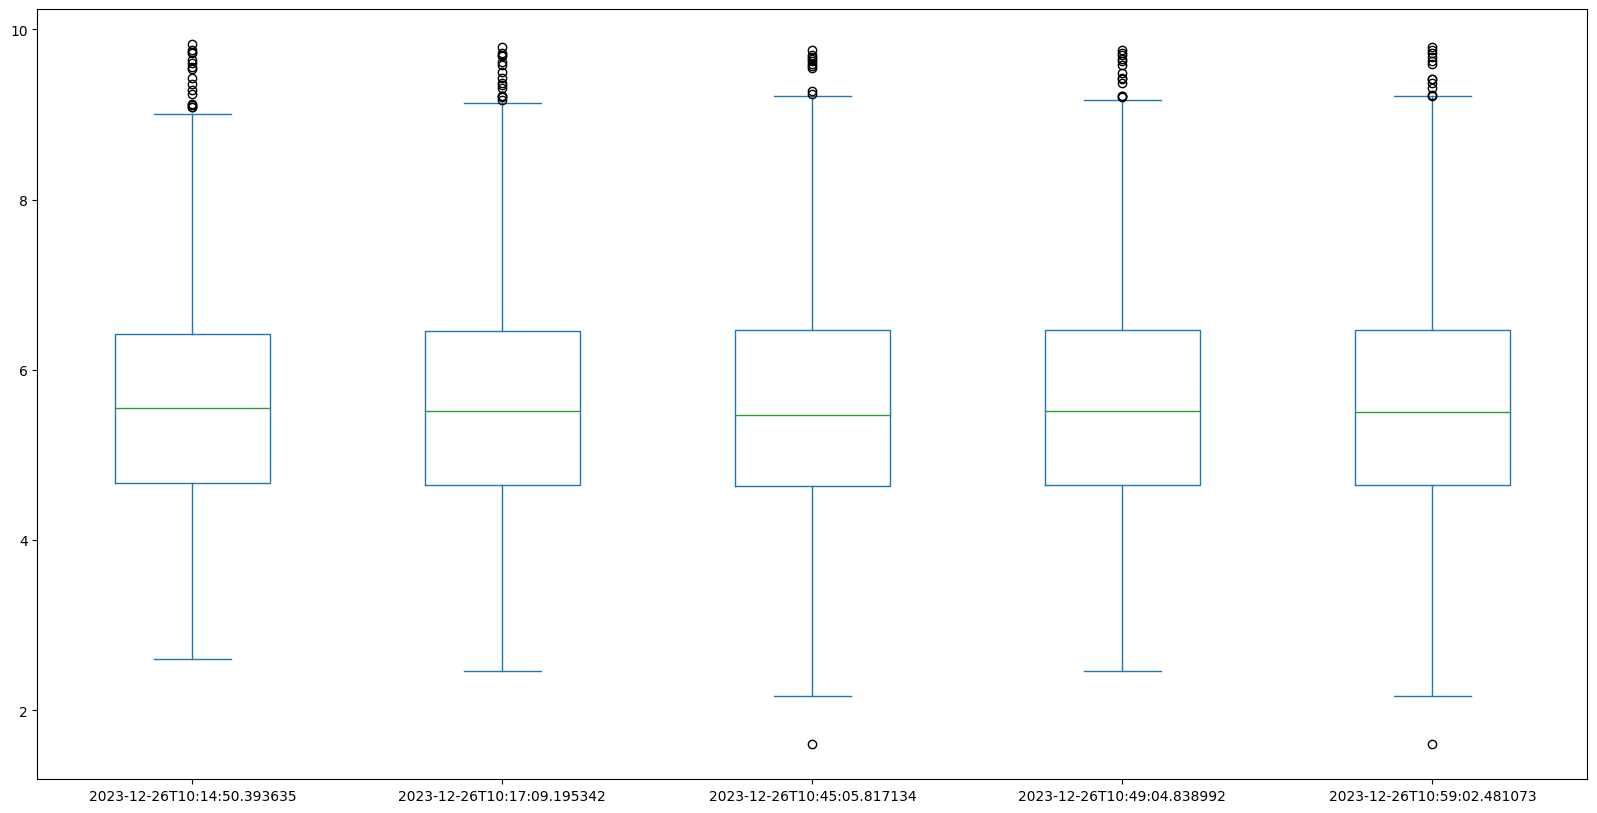

In [704]:
df.plot(kind="box", figsize=(20, 10))
plt.show()

In [705]:
df.sort_values(by=[cur_time], ascending=False)

,2023-12-26T10:14:50.393635,2023-12-26T10:17:09.195342,2023-12-26T10:45:05.817134,2023-12-26T10:49:04.838992,2023-12-26T10:59:02.481073
0369.txt,9.637313,9.588164,9.650032,9.588164,9.788731
0696.txt,9.826034,9.684918,9.760335,9.760335,9.760335
0759.txt,9.727016,9.727986,9.702426,9.727986,9.727986
0935.txt,9.739267,9.620453,9.675063,9.651413,9.675063
0517.txt,9.753075,9.794100,9.628308,9.628308,9.628308
...,...,...,...,...,...
0936.txt,2.718502,2.715167,2.715167,2.715167,2.715167
0266.txt,5.771293,2.700704,5.354669,2.700704,2.700704
0795.txt,4.975496,2.468347,2.468347,2.468347,2.468347
0797.txt,6.558116,6.653668,2.173186,6.653668,2.173186


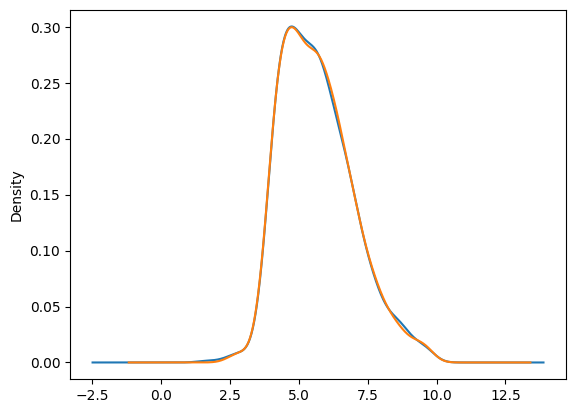

In [706]:
# bins = np.linspace(0, 10, 40)
last_sel = df.iloc[:, -1]
last_sel.plot.kde()
last2_sel = df.iloc[:, -2]
last2_sel.plot.kde()
plt.show()

In [707]:
last_df = df.iloc[:, -1]
wins = df.sub(last_df, axis=0)<0
loses = df.sub(last_df, axis=0)>0
win_cnt = wins.sum(axis=0)
lose_cnt = loses.sum(axis=0)
(win_cnt - lose_cnt).sort_index(ascending=False)

2023-12-26T10:59:02.481073     0
2023-12-26T10:49:04.838992    24
2023-12-26T10:45:05.817134    25
2023-12-26T10:17:09.195342    37
2023-12-26T10:14:50.393635    50
dtype: int64